In [1]:
import torch
import torchvision
from torchvision import transforms, datasets
from matplotlib import pyplot as plt

import btorch
import btorch.nn as nn
from btorch.vision import models

In [2]:
class ResNet(nn.Module):
    def __init__(self, num_classes) -> None:
        super(ResNet, self).__init__()
        self.pre_process = nn.Conv2d(1,3,1)
        self.model = models.bresnet50(num_classes, include_top=False)
        self.last = nn.Linear(2048, num_classes)
    def forward(self, x):
        x=self.pre_process(x)
        x=self.model(x)
        x=torch.flatten(x, 1)
        x=self.last(x)
        return x
    # Overwrite our predict function
    @classmethod
    def predict_(cls, net, loader, device='cuda', config=None):
        net.to(device)
        net.eval()
        out = []
        with torch.inference_mode():
            for batch_idx, (inputs, _) in enumerate(loader):
                inputs =  inputs.to(device)
                logit = net(inputs)
                answer = torch.max(torch.softmax(logit,1), 1)
                out.append(answer)
        return out

In [3]:
# DataSet
transform = transforms.Compose(
    [transforms.ToTensor()])
batch_size = 4
trainset = datasets.MNIST(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size,
                                          shuffle=True)
testset = datasets.MNIST(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size,
                                         shuffle=False)

In [4]:
# Model
net = ResNet(20)

# Loss & Optimizer & Config
net._optimizer = torch.optim.SGD(net.parameters(), lr=0.001, momentum=0.9)
net._lossfn = nn.CrossEntropyLoss()
net._config = {'max_epoch':3}

# Set GPU
device = net.auto_gpu()

using GPU


In [5]:
# FIT
net.fit(trainloader)

epoch 1 iter 14999: train loss 0.49192.: 100%|██████████| 15000/15000 [06:19<00:00, 39.49it/s]


Epoch 0: Training loss: 3.0421884029347384. Testing loss: Not Provided


epoch 2 iter 14999: train loss 1.28486.: 100%|██████████| 15000/15000 [06:19<00:00, 39.57it/s]


Epoch 1: Training loss: 1.2601886980640178. Testing loss: Not Provided


epoch 3 iter 14999: train loss 0.00510.: 100%|██████████| 15000/15000 [06:19<00:00, 39.55it/s]

Epoch 2: Training loss: 0.8450309404143802. Testing loss: Not Provided


In [6]:
# Load one batch of test data and do prediction
for i in testloader:
    break

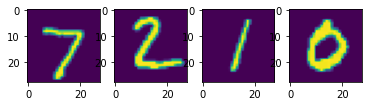

In [8]:
fig, ax = plt.subplots(1, 4)
for idx in range(len(i[0])):
    ax[idx].imshow(i[0][idx][0].cpu().detach())
plt.show()

In [9]:
net.predict(i[0])

[torch.return_types.max(
 values=tensor([1.0000, 1.0000, 0.9934, 0.8306], device='cuda:0'),
 indices=tensor([7, 2, 1, 0], device='cuda:0'))]